# Import necessary packages and plugins.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
PATH = "nile/"

In [4]:
!ls {PATH}

mapdata_copyright_openstreetmap_contributors.rds
mapdata_copyright_openstreetmap_contributors.txt
noaa_weather_qclcd_documentation.pdf
sampleSubmission.csv
spray.csv
test.csv
train.csv
weather.csv
west_nile.zip


Set df_raw to the training data and parse_dates to date or change completely depending on what we focus on.

In [5]:
df_right = pd.read_csv(f'{PATH}weather.csv', low_memory=False, 
                     parse_dates=["Date"])
#
df_left = pd.read_csv(f'{PATH}train.csv', low_memory=False, 
                     parse_dates=["Date"])
#
df_raw = pd.merge(left=df_left, right=df_right, on="Date", how="inner")

In [6]:
df_raw.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5


Definte display_all.

In [7]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [8]:
#Drop inf, -inf, NaN from pandas frame
df_raw[df_raw.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [9]:
#Drop unneccesary columns
df_raw.drop(columns=['Address', 'AddressNumberAndStreet', 'Street',], inplace=True)

In [10]:
display_all(df_raw.tail().T)

,21007,21008,21009,21010,21011
Date,2013-09-26 00:00:00,2013-09-26 00:00:00,2013-09-26 00:00:00,2013-09-26 00:00:00,2013-09-26 00:00:00
Species,CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS
Block,17,71,71,42,42
Trap,T232,T233,T233,T235,T235
Latitude,41.9126,42.0099,42.0099,41.7764,41.7764
Longitude,-87.6681,-87.8073,-87.8073,-87.6271,-87.6271
AddressAccuracy,9,9,9,8,8
NumMosquitos,1,5,5,1,1
WnvPresent,0,0,0,0,0
Station,2,1,2,1,2


In [11]:
df_raw.Trap = df_raw.Trap.str[1:]
df_raw.Trap.head()

0    002
1    002
2    002
3    002
4    007
Name: Trap, dtype: object

In [12]:
df_raw[df_raw.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

,Date,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,002,41.954690,-87.800991,9,1,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,CULEX PIPIENS/RESTUANS,41,002,41.954690,-87.800991,9,1,0,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,CULEX RESTUANS,41,002,41.954690,-87.800991,9,1,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,CULEX RESTUANS,41,002,41.954690,-87.800991,9,1,0,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,CULEX RESTUANS,62,007,41.994991,-87.769279,9,1,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,CULEX RESTUANS,62,007,41.994991,-87.769279,9,1,0,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,CULEX PIPIENS/RESTUANS,79,015,41.974089,-87.824812,8,1,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,CULEX PIPIENS/RESTUANS,79,015,41.974089,-87.824812,8,1,0,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,CULEX RESTUANS,79,015,41.974089,-87.824812,8,4,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,CULEX RESTUANS,79,015,41.974089,-87.824812,8,4,0,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [13]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,21012,95,2007-08-01 00:00:00,1102,2007-05-29 00:00:00,2013-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Species,21012,7,CULEX PIPIENS/RESTUANS,9504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,21012,NaN,NaN,NaN,NaN,NaN,35.6878,24.3389,10,12,33,52,98
Trap,21012,136,900,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,21012,NaN,NaN,NaN,NaN,NaN,41.8411,0.112739,41.6446,41.733,41.8463,41.9547,42.0174
Longitude,21012,NaN,NaN,NaN,NaN,NaN,-87.6999,0.0965119,-87.931,-87.7601,-87.695,-87.6278,-87.5316
AddressAccuracy,21012,NaN,NaN,NaN,NaN,NaN,7.81953,1.45289,3,8,8,9,9
NumMosquitos,21012,NaN,NaN,NaN,NaN,NaN,12.8535,16.1334,1,2,5,17,50
WnvPresent,21012,NaN,NaN,NaN,NaN,NaN,0.0524462,0.22293,0,0,0,0,1
Station,21012,NaN,NaN,NaN,NaN,NaN,1.5,0.500012,1,1,1.5,2,2


In [14]:
df_raw.NumMosquitos = np.log(df_raw.NumMosquitos)

This dataset contains a mix of continuous and categorical variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals. You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In [15]:
df_raw.head()

,Date,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,002,41.954690,-87.800991,9,0.0,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,CULEX PIPIENS/RESTUANS,41,002,41.954690,-87.800991,9,0.0,0,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,CULEX RESTUANS,41,002,41.954690,-87.800991,9,0.0,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,CULEX RESTUANS,41,002,41.954690,-87.800991,9,0.0,0,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,CULEX RESTUANS,62,007,41.994991,-87.769279,9,0.0,0,1,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5


The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call train_cats to convert strings to pandas categories.

In [16]:
add_datepart(df_raw, 'Date')

In [17]:
train_cats(df_raw)

We can specify the order to use for categorical variables if we wish:

In [18]:
df_raw.Species.cat.categories

Index(['CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
       'CULEX TERRITANS'],
      dtype='object')

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [19]:
df_raw.Species.cat.set_categories(['CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
       'CULEX TERRITANS'], ordered=True, inplace=True)

In [20]:
df_raw.Species = df_raw.Species.cat.codes

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [21]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

AddressAccuracy     0.0
AvgSpeed            0.0
Block               0.0
CodeSum             0.0
Cool                0.0
Day                 0.0
Dayofweek           0.0
Dayofyear           0.0
Depart              0.0
Depth               0.0
DewPoint            0.0
Elapsed             0.0
Heat                0.0
Is_month_end        0.0
Is_month_start      0.0
Is_quarter_end      0.0
Is_quarter_start    0.0
Is_year_end         0.0
Is_year_start       0.0
Latitude            0.0
Longitude           0.0
Month               0.0
NumMosquitos        0.0
PrecipTotal         0.0
ResultDir           0.0
ResultSpeed         0.0
SeaLevel            0.0
SnowFall            0.0
Species             0.0
Station             0.0
StnPressure         0.0
Sunrise             0.0
Sunset              0.0
Tavg                0.0
Tmax                0.0
Tmin                0.0
Trap                0.0
Water1              0.0
Week                0.0
WetBulb             0.0
WnvPresent          0.0
Year            

In [22]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/nile-merged')

# Pre-Processing

In [23]:
df_raw = pd.read_feather('tmp/nile-merged')

/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [41]:
df_raw.drop('WnvPresent', axis=1)

,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,Station,Tmax,Tmin,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,2,41,002,41.954690,-87.800991,9,0.000000,1,88,60,...,29,1,149,False,False,False,False,False,False,1180396800
1,2,41,002,41.954690,-87.800991,9,0.000000,2,88,65,...,29,1,149,False,False,False,False,False,False,1180396800
2,3,41,002,41.954690,-87.800991,9,0.000000,1,88,60,...,29,1,149,False,False,False,False,False,False,1180396800
3,3,41,002,41.954690,-87.800991,9,0.000000,2,88,65,...,29,1,149,False,False,False,False,False,False,1180396800
4,3,62,007,41.994991,-87.769279,9,0.000000,1,88,60,...,29,1,149,False,False,False,False,False,False,1180396800
5,3,62,007,41.994991,-87.769279,9,0.000000,2,88,65,...,29,1,149,False,False,False,False,False,False,1180396800
6,2,79,015,41.974089,-87.824812,8,0.000000,1,88,60,...,29,1,149,False,False,False,False,False,False,1180396800
7,2,79,015,41.974089,-87.824812,8,0.000000,2,88,65,...,29,1,149,False,False,False,False,False,False,1180396800
8,3,79,015,41.974089,-87.824812,8,1.386294,1,88,60,...,29,1,149,False,False,False,False,False,False,1180396800
9,3,79,015,41.974089,-87.824812,8,1.386294,2,88,65,...,29,1,149,False,False,False,False,False,False,1180396800


In [42]:
df, y, nas = proc_df(df_raw, 'WnvPresent')

We now have something we can pass to a random forest!

In [43]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.8165492388086114

# Validation Sets

In [44]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((9012, 41), (9012,), (12000, 41))

# Base Models

In [45]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [46]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 302 ms, sys: 4.84 ms, total: 307 ms
Wall time: 129 ms
[0.11352541016491699, 0.22893575515086714, 0.7403258874172647, -0.05363146096741378]


# Single Tree

In [47]:
df_trn, y_trn, nas = proc_df(df_raw, 'WnvPresent', subset=50000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [48]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.20146777769105748, 0.20867496484496487, 0.10466646296985793, 0.12460880104440585]


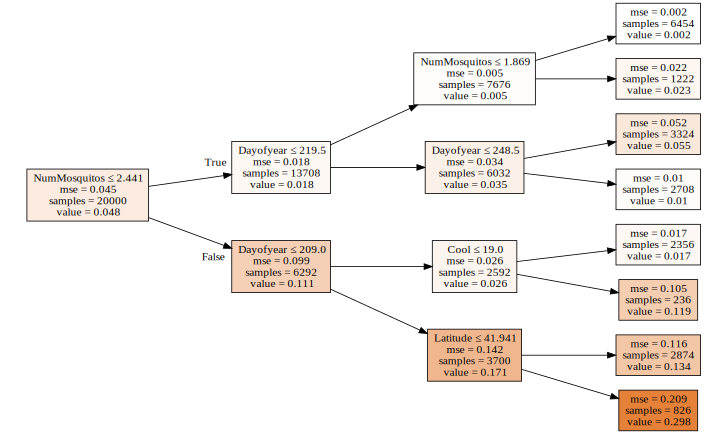

In [49]:
draw_tree(m.estimators_[0], df_trn, precision=3)

# Bagging

In [33]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0928213424396314, 0.127206506677595, 0.8099493536828826, 0.6747029457747551]


In [34]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0.0, 0)

In [108]:
preds.shape

(10, 12000)

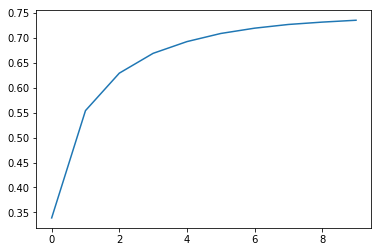

In [109]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [110]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.40937207720534685, 0.4277029131702484, 0.8131221195674321, 0.7611048913890414]


In [111]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.4011354648866068, 0.41906967045491816, 0.82056647588405, 0.7706518179112424]


In [112]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.3957662569109368, 0.41575582110720305, 0.825337772963677, 0.7742646793333222]


# OOB Score

In [41]:
df_trn, y_trn, nas = proc_df(df_raw, 'NumMosquitos', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [42]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.3839782197711851, 0.521756789393103, 0.9188466969678653, 0.8306912716369218, 0.7218381098619928]


# Sub Sampling

In [43]:
df_trn, y_trn, nas = proc_df(df_raw, 'NumMosquitos')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [44]:
set_rf_samples(20000)

In [45]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 885 ms, sys: 12.5 ms, total: 898 ms
Wall time: 251 ms
[0.32443534649102235, 1.324108974775715, 0.9485608830894517, -0.09041191432336015, 0.014468529334576652]


In [46]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.31714649403185774, 1.2943650531510966, 0.9508462103468748, -0.04197353226599132, 0.753692444949035]


# Tree Building Samples

In [47]:
reset_rf_samples()

In [48]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.36548861047827325, 1.2562882112253893, 0.9347192894618291, 0.018429045816381495, 0.7775428594450944]


In [49]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.4900856018552595, 1.255014482437502, 0.8826235245735223, 0.02041843227170237, 0.7538037139161039]


In [50]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5077685005785199, 1.203184526436079, 0.8740005385165907, 0.09965780138579183, 0.7501714947628829]


In [58]:
df_raw.Species.head(200)

0      2
1      2
2      3
3      3
4      3
5      3
6      2
7      2
8      3
9      3
10     3
11     3
12     3
13     3
14     2
15     2
16     3
17     3
18     3
19     3
20     2
21     2
22     2
23     2
24     3
25     3
26     2
27     2
28     3
29     3
      ..
170    2
171    2
172    3
173    3
174    4
175    4
176    2
177    2
178    3
179    3
180    3
181    3
182    2
183    2
184    3
185    3
186    2
187    2
188    3
189    3
190    2
191    2
192    3
193    3
194    3
195    3
196    2
197    2
198    2
199    2
Name: Species, Length: 200, dtype: int8